Copyright &copy; 2015 Ondrej Martinsky, All rights reserved

[www.quantandfinancial.com](http://www.quantandfinancial.com)
# Principal Component Analysis (PCA)

In [1]:
from numpy import testing
from mpl_toolkits.mplot3d import Axes3D
%pylab
%matplotlib inline
seed(0)
class Eigen:
    def __init__(self,value,vector):
        self.value,self.vector=value,vector

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


## Load/Create Data
Create three series of data which we will analyze using PCA

Dimensionality:  (3, 100)


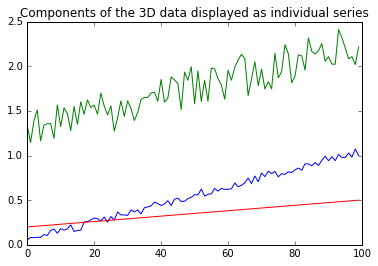

In [2]:
data3D = zeros((3,100))
data3D[0] = linspace(0,1,100) + rand(100)*0.1
data3D[1] = linspace(1,2,100) + rand(100)*0.5
data3D[2] = linspace(0.2,0.5,100)

print('Dimensionality: ', data3D.shape)

plot(data3D.transpose());
title('Components of the 3D data displayed as individual series');

## Calculate Correlation and Covariance Matrix $\Sigma$

#### Covariance matrix $\Sigma$
$$ \Sigma_{x,y} = \frac{1}{n}\sum_{i=1}^{n}((X_i-\bar{X})(Y_i-\bar{Y})) = E[(X-E[X])(Y-E[Y])] $$
Calculate covariance matrix between three series of data

In [3]:
Sigma = cov(data3D)
print(Sigma)

[[ 0.08241935  0.07541586  0.0251183 ]
 [ 0.07541586  0.08911996  0.02334904]
 [ 0.0251183   0.02334904  0.0077288 ]]


#### Correlation Matrix
$$ correl_{x,y} = \frac{\Sigma_{x,y}}{\sigma_x \sigma_y} $$

In [4]:
Correlation = corrcoef(Sigma)
print(Correlation)

[[ 1.          0.95201736  0.99980609]
 [ 0.95201736  1.          0.95785949]
 [ 0.99980609  0.95785949  1.        ]]


## Calculate Eigenvalues and Eigenvectors

Eigenvalues is diagonal in matrix $\Lambda$

Eigenvectors $V$ are calculated in such way that matrix $\Lambda$ is as much "diagonal" as possible. Eigenvalues are then on that diagonal and the other cells are as close to 0 as possible

$\Sigma = V\Lambda V^T$

In [5]:
eig_vals, V = linalg.eig(Sigma)

### Eigen Values and Eigenvectors
Eigenvectors are columns in the matrix $V$

Eigenvalues are numbers from diagonal in matrix $\Lambda$

In [6]:
print(eig_vals)
print()
print(V)

[  1.68549069e-01   1.06571537e-02   6.18892395e-05]

[[-0.67799357 -0.68061157 -0.27765557]
 [-0.704953    0.70905721 -0.01670755]
 [-0.20824503 -0.18440652  0.96053539]]


### Determine eigenvectors with largest eigenvalues

In [7]:
eig_pairs = [Eigen(abs(eig_vals[i]), V.transpose()[i]) for i in range(len(eig_vals))]
for v in V:
    testing.assert_array_almost_equal(1.0, np.linalg.norm(v))
print("All eigenvectors have the same norm")
eig_pairs.sort(key=lambda x: x.value, reverse=True)
print()
print('Eigen values and eigen vectors in descending order')
for i, pair in enumerate(eig_pairs):
    print("[%i]   Value=%f, Vector=[%s]" % (i, pair.value, ",".join([str(x) for x in pair.vector])))
    print("      explains %f%% of variance" % (100 * pair.value / sum(eig_vals)))

All eigenvectors have the same norm

Eigen values and eigen vectors in descending order
[0]   Value=0.168549, Vector=[-0.677993565383,-0.704953000036,-0.208245031249]
      explains 94.020664% of variance
[1]   Value=0.010657, Vector=[-0.680611571144,0.709057209012,-0.184406517166]
      explains 5.944813% of variance
[2]   Value=0.000062, Vector=[-0.277655568151,-0.0167075458478,0.960535394135]
      explains 0.034523% of variance


Verify relationship $\Sigma = V \Lambda V'$

by calculating $\Lambda = V' * \Sigma * V$

In [8]:
Lambda = inv(V) * Sigma * V
print(Lambda)
print()
print(V * Lambda * inv(V))
print()
print(Sigma)

[[  3.78861359e-02   3.61844662e-02   1.45235023e-03]
 [  3.61844662e-02   4.48061417e-02   7.19379188e-05]
 [  1.45235023e-03   7.19379188e-05   7.13081210e-03]]

[[  1.74153199e-02   1.73612768e-02   8.39754602e-05]
 [  1.73612768e-02   2.25268311e-02   2.21639313e-07]
 [  8.39754602e-05   2.21639313e-07   6.57908865e-03]]

[[ 0.08241935  0.07541586  0.0251183 ]
 [ 0.07541586  0.08911996  0.02334904]
 [ 0.0251183   0.02334904  0.0077288 ]]


## Create Transformation Matrix
Select only those eigenvectors (columns) which have highest eigenvalues

In [9]:
dimensions = 2
transformation = matrix(hstack(pair.vector.reshape(-1,1) for pair in eig_pairs[:dimensions]))
print("Transformation matrix to %i dimensions " % transformation.shape[1])
print(transformation)

Transformation matrix to 2 dimensions 
[[-0.67799357 -0.68061157]
 [-0.704953    0.70905721]
 [-0.20824503 -0.18440652]]


## Transform Data

In [10]:
data2D = data3D.transpose() * transformation

## Display Data

In [11]:
print('Dimensionality of data before PCA transformation ', data3D.transpose().shape)
print('Dimensionality of data after PCA transformation  ', data2D.shape)

Dimensionality of data before PCA transformation  (100, 3)
Dimensionality of data after PCA transformation   (100, 2)


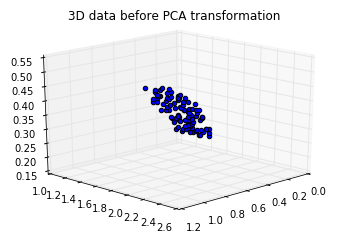

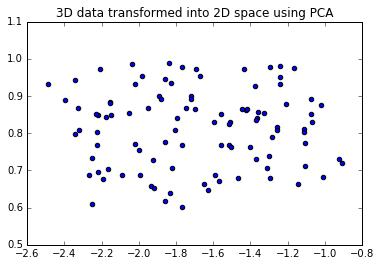

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=45)
for point in asarray(data3D.transpose()):
    ax.scatter(point[0], point[1], point[2])
title('3D data before PCA transformation')

fig = plt.figure()
ax = fig.add_subplot(111)
for point in asarray(data2D):
    ax.scatter(point[0], point[1])
title('3D data transformed into 2D space using PCA')

show();